# Algoritma: Penyebaran penyakit/virus dengan Random Walk
1 Inisialisasi variabel scalar
- jumlah individu
- rasio individu yang terinfeksi
- waktu pemulihan
- ukuran ruang simulasi
- probabilitas individu bergerak
2 Inisialisasi variabel list
- posisi masing-masing individu
- status kesehatan individu (individu dengan rasio tertentu berstatus terinfeksi)
- status imunitas individu
- waktu terinfeksi individu

3 Iterasi
Selama jumlah individu terinfeksi > 0:
- Untuk setiap individu:
- Update posisi berdasarkan probabilitas individu bergerak
- Koreksi posisi dengan PBC
- Update waktu terinfeksi untuk individu yang sudah terinfeksi.
- Update status kesehatan individu - recovery
- Jika waktu terinfeksi > waktu pemulihan, maka individu yang
terinfeksi didefinisikan pulih
- Update status imun individu (individu yang sudah pulih memiliki imun
sehingga tidak akan terinfeksi lagi)
- Update status kesehatan individu – infection
- Hitung jarak individu sehat dengan individu terinfeksi
- Jika jarak individu sehat sama dengan individu terinfeksi dan
individu tersebut belum memiliki imun, maka individu sehat
tersebut terinfeksi
- Hitung dan simpan jumlah individu terinfeksi

# Instruksi Tugas
Buatlah simulasi penyebaran penyakit/virus dengan menggunakan Random Walk 4 Arah dengan menggunakan variabel-variabel berikut:

- Jumlah individu: 200
- Rasio individu terinfeksi: 5%
- Probabilitas individu bergerak: 80%
- Waktu pemulihan: 10 hari
- Ukuran ruang simulasi: 20 x 20 unit

Challenge 1 (80 poin) a. Lakukan simulasi dan buatlah plot jumlah individu yang terinfeksi tiap harinya. b. Tentukan waktu pemulihan yang diperlukan oleh komunitas tersebut.

Challenge 2 (20 poin) Buatlah video dari simulasi tersebut dan berikan pembeda (misal: warna) untuk individu yang sehat dan individu yang terinfeksi.

Anggota Kelompok :
- Subkhan Ibnu Aji (1301172001)
- Baginda Achmad Fadillah (1301174338)

In [77]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import imageio

In [110]:
# membuat kelas orang
class Orang:
    def __init__(self, waktu_penyembuhan, p, size):
        # random posisi awal
        self.x = np.random.randint(size[0])
        self.y = np.random.randint(size[1])
        # mencatat perubahan posisi tiap orang
        self.histori_posisi = [np.array([self.x, self.y])]
        # inisiasi variabel awal
        self.apakah_terinfeksi = False
        self.waktu_penyembuhan = waktu_penyembuhan
        self.probabilitas = p
        self.apakah_kebal = False
        self.size = size
        self.waktu_terinfeksi = 0
        
        
    def updateKondisi(self):
        # jika terinfeksi, maka tambah waktu terinfeksi
        if self.apakah_terinfeksi:
            self.waktu_terinfeksi += 1
            # jika waktu terinfeksi sama dengan waktu penyebuhan, maka orang ini sembuh dan kebal
            if self.waktu_terinfeksi == self.waktu_penyembuhan:
                self.apakah_terinfeksi = False
                self.apakah_kebal = True
                
                
    def move(self):
        # bangkitkan bilangan acak, lalu cek jika diatas probabilitas individu bergerak, jangan gerak
        if np.random.random() > self.probabilitas:
            return
        arah = np.random.randint(4)
        if arah == 0: # atas
            self.y += 1
        elif arah == 1: # kanan
            self.x += 1
        elif arah == 2: # bawah
            self.y -= 1
        else: # kiri
            self.x -= 1
        # mengecek pbc, jika lewat maka geser ulang
        self.pbc()
        self.histori_posisi.append(np.array([self.x, self.y]))
        
        
    def pbc(self):
        # Handle koordinat yang melebihi batas
        if self.x >= self.size[0]:
            self.x -= self.size[0]
        elif self.x < 0:
            self.x += self.size[0]
            
        # jika Y melebihi batas, geser ke arah sebaliknya sebanyak batas
        if self.y >= self.size[1]:
            self.y -= self.size[1]
        elif self.y < 0:
            self.y += self.size[1]

In [114]:
class Wilayah:
    def __init__(self, populasi, rasio_terinfeksi, waktu_penyembuhan, size, p):
        # buat populasi
        self.populasi = [Orang(waktu_penyembuhan, p, size) for x in range(populasi)]
        # inisialisasi variabel
        self.rasio_terinfeksi = rasio_terinfeksi
        self.size = size
        # inisialisasi yg sakit
        for i in range(populasi):
            if np.random.random() < self.rasio_terinfeksi:
                self.populasi[i].apakah_terinfeksi = True
                
    # fungsi untuk menggambar kondisi populasi (merah sakit, hijau sehat)
    def draw(self):
        tidakterinfeksi, terinfeksi = self.bagiPosisiTerinfeksi()
        if terinfeksi.shape[0] > 0:
            plt.scatter(terinfeksi[0], terinfeksi[1], color='#ff6781')
        if tidakterinfeksi.shape[0] > 0:
            plt.scatter(tidakterinfeksi[0], tidakterinfeksi[1], color='#00bdaa')
        plt.show()
    
    # Fungsi untuk memisahkan orang sakit dan tidak, kemudian return koordinat posisinya
    def bagiPosisiTerinfeksi(self):
        tidakterinfeksi = []
        terinfeksi = []
        for orang in self.populasi:
            if orang.apakah_terinfeksi:
                terinfeksi.append(np.array([orang.x, orang.y]))
            else:
                tidakterinfeksi.append(np.array([orang.x, orang.y]))
        return np.array(tidakterinfeksi).T, np.array(terinfeksi).T
    
    # fungsi untuk memisahkan orang sakit dan tidak, kemudian return orangnya
    def bagiTerinfeksi(self):
        tidakterinfeksi = []
        terinfeksi = []
        for orang in self.populasi:
            if orang.apakah_terinfeksi:
                terinfeksi.append(orang)
            else:
                tidakterinfeksi.append(orang)
        return tidakterinfeksi, terinfeksi
    
    # fungsi untuk menghitung jarak antar 2 orang
    def jarak(self, p1, p2):
        return np.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)
    
    # fungsi untuk mengecek apakah ada orang yg bisa diinfeksi
    def menular(self):
        tidakterinfeksi, terinfeksi = self.bagiTerinfeksi()
        for infeksi in terinfeksi:
            for tidakinfeksi in tidakterinfeksi:
                # kalo orang ini tidak punya imun dan dia bersentuhan dgn org yg terinfeksi, tularkan dia penyakit
                if (tidakinfeksi.apakah_kebal == False) and (self.jarak(infeksi, tidakinfeksi) == 0):
                    tidakinfeksi.apakah_terinfeksi = True
    
    # fungsi untuk simulasi per-hari
    def simulasi(self, hari):
        # update posisi dan kondisi tiap orang
        for orang in self.populasi:
            orang.move()
            orang.updateKondisi()
            
        # cek apakah ada yg tertular 
        self.menular()
        # pisahkan orang yang terinfeksi dengan yang tidak, kemudian generate gambarnya
        tidakterinfeksi, terinfeksi = self.bagiPosisiTerinfeksi()
        if(len(terinfeksi.shape) == 2):
            self.jumlahTerinfeksi.append(terinfeksi.shape[1])
        fig, ax = plt.subplots(figsize=(10,10))
        if terinfeksi.shape[0] > 0:
            ax.scatter(terinfeksi[0] + 0.5, terinfeksi[1] + 0.5, color='#ff6781')
        if tidakterinfeksi.shape[0] > 0:
            ax.scatter(tidakterinfeksi[0] + 0.5, tidakterinfeksi[1] + 0.5, color='#00bdaa')
        ax.set_xlim(0, self.size[0])
        ax.set_ylim(0, self.size[1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Peta Penyebaran Virus Mers di Wilayah X Hari ke-"+str(hari))
        ax.grid(True)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        
        return image
    
    # fungsi untuk mengecek apakah ada orang yg terinfeksi
    def apakahAdayangTerinfeksi(self):
        tidakterinfeksi, terinfeksi = self.bagiTerinfeksi()
        return len(terinfeksi) > 0
    
    # fungsi untuk membuat animasi gif
    def animasi(self, fps):
        frames = []
        self.jumlahTerinfeksi = []
        hari = 1
        while self.apakahAdayangTerinfeksi():
            frames.append(self.simulasi(hari))
            hari += 1
        imageio.mimsave('./simulasi_virus_mers.gif', frames, fps=fps)
    

    
    # fungsi untuk memetakan orang yang terinfeksi tiap harinya
    def plotTerinfeksi(self,fps):
        plot = []
        x = np.arange(0, len(self.jumlahTerinfeksi), 1)
        plt.plot(x, self.jumlahTerinfeksi)
        plt.xlabel("Hari")
        plt.ylabel("Jumlah Terinfeksi virus MERS")
        plt.title("Jumlah terinfeksi virus MERS per hari")
        plt.grid(True)
        plt.savefig('./Grafik Kasus Mers di Wilayah X.png')
        plt.show()

- Jumlah individu: 200
- Rasio individu terinfeksi: 0.05
- Probabilitas individu bergerak: 0.8
- Waktu pemulihan: 10
- Ukuran ruang simulasi / ukuran grid : (20, 20) 

In [115]:
wilayah = Wilayah(200, 0.05, 10, (20, 20), 0.1)

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


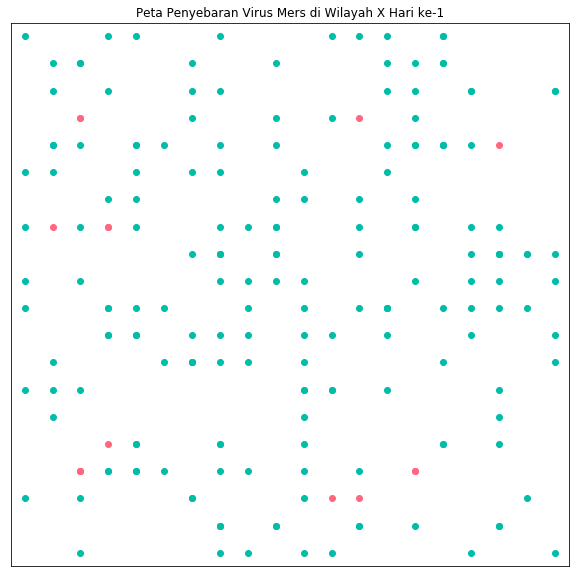

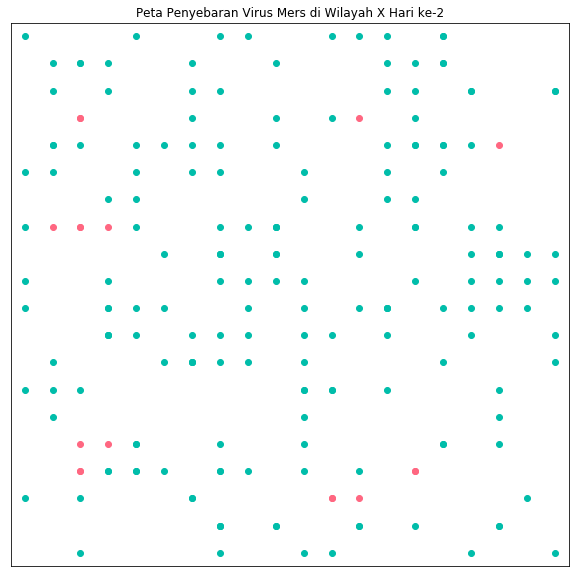

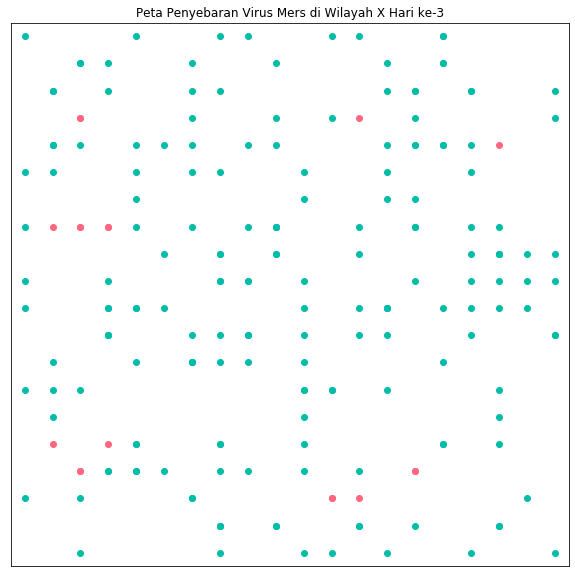

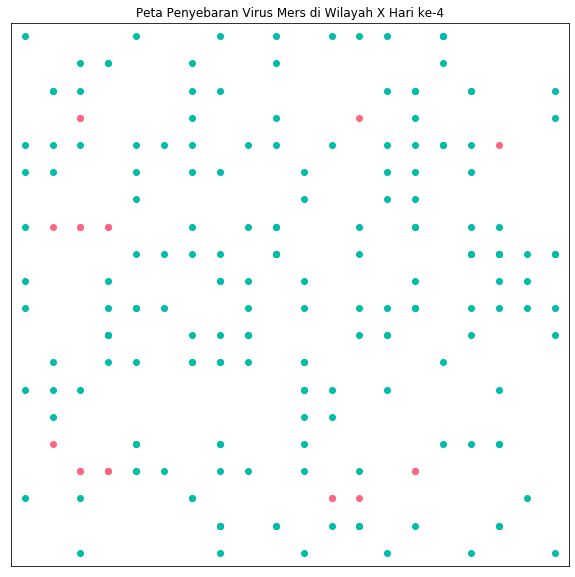

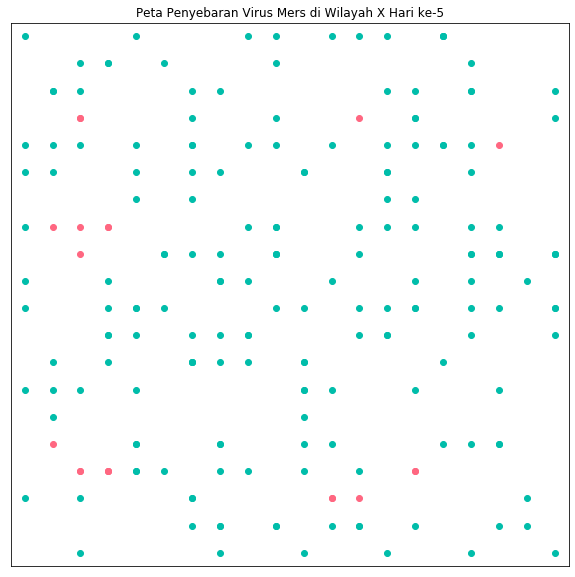

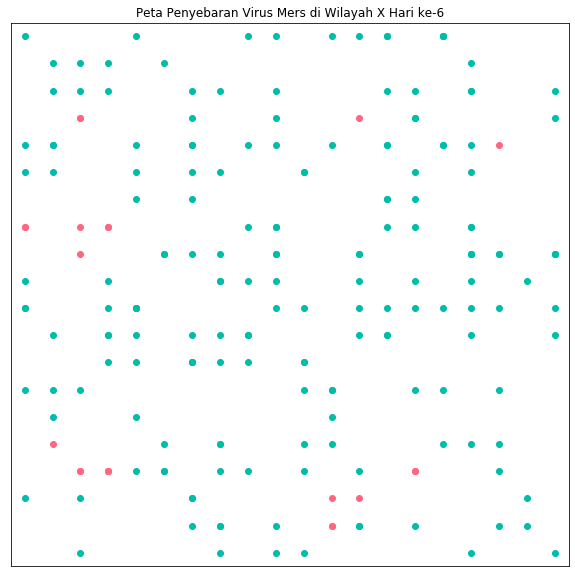

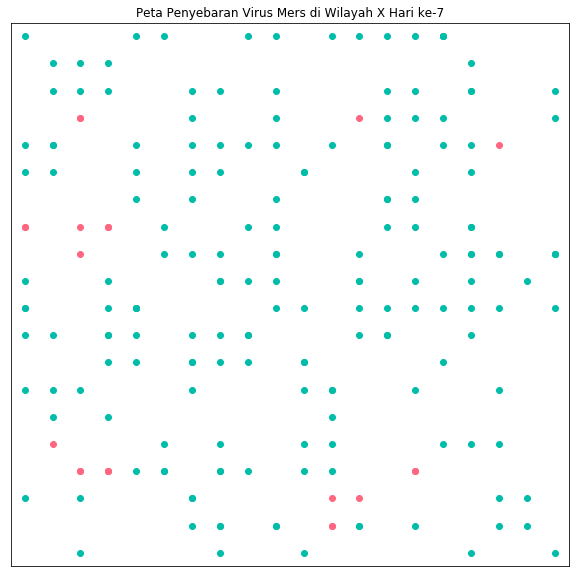

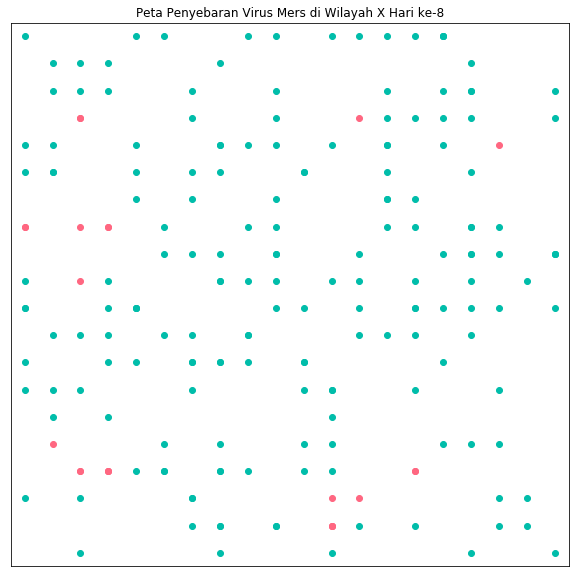

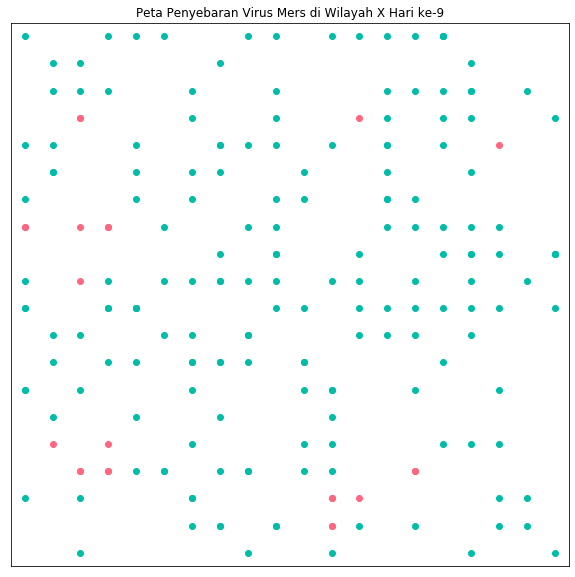

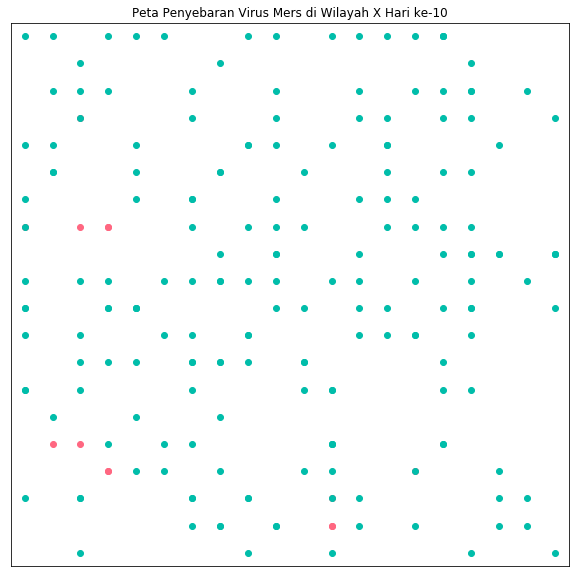

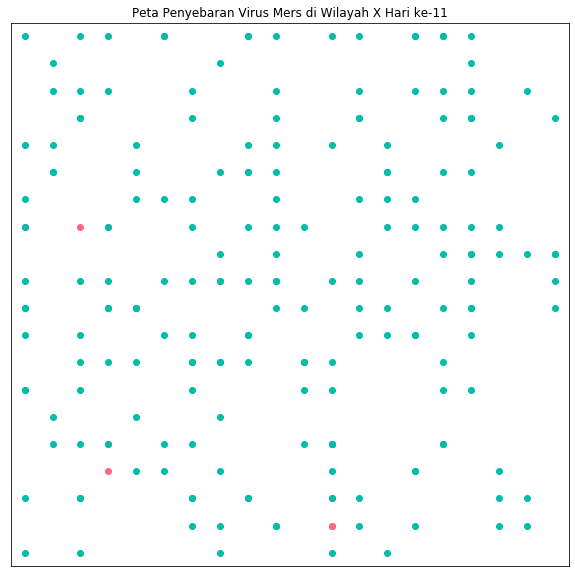

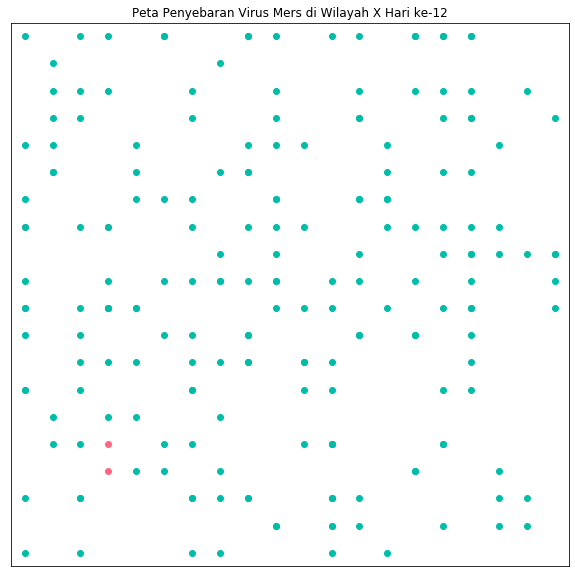

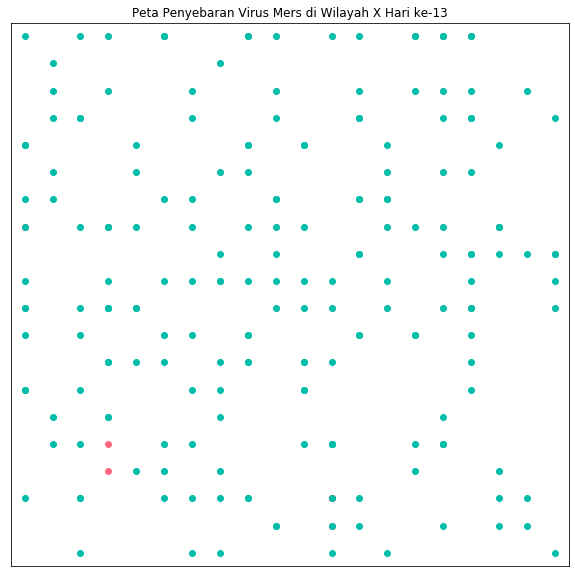

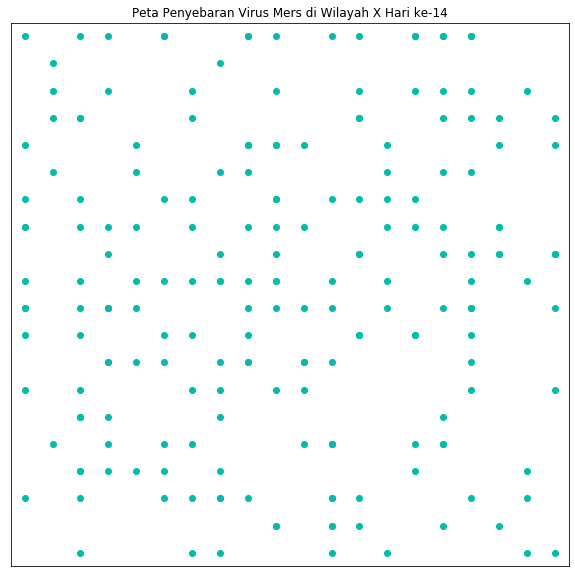

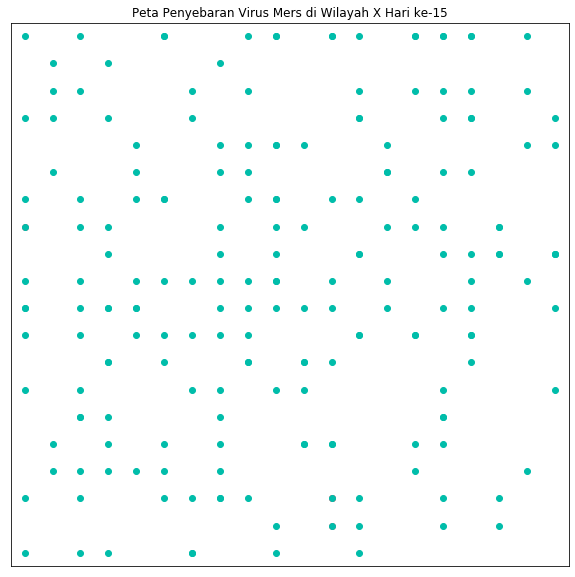

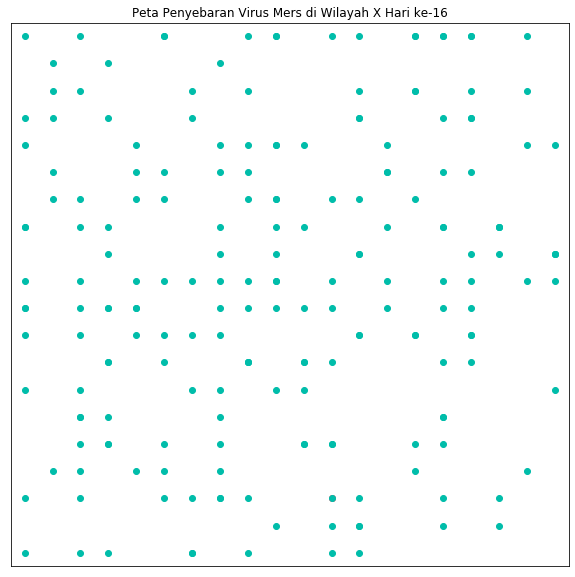

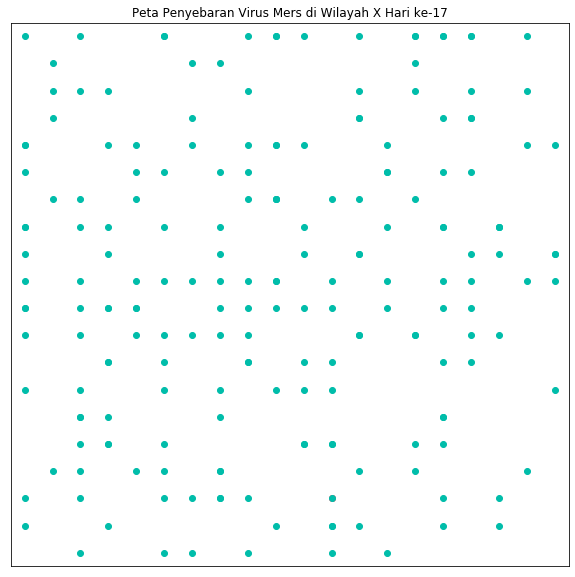

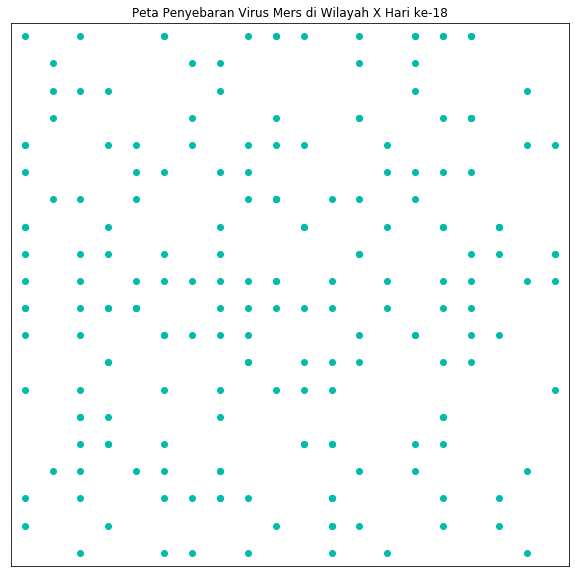

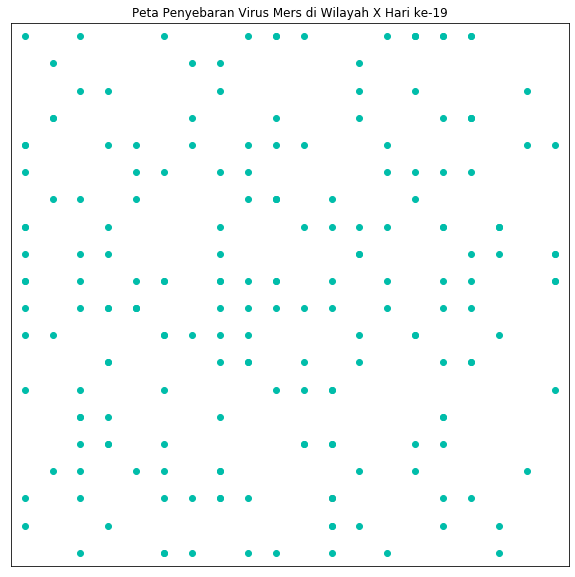

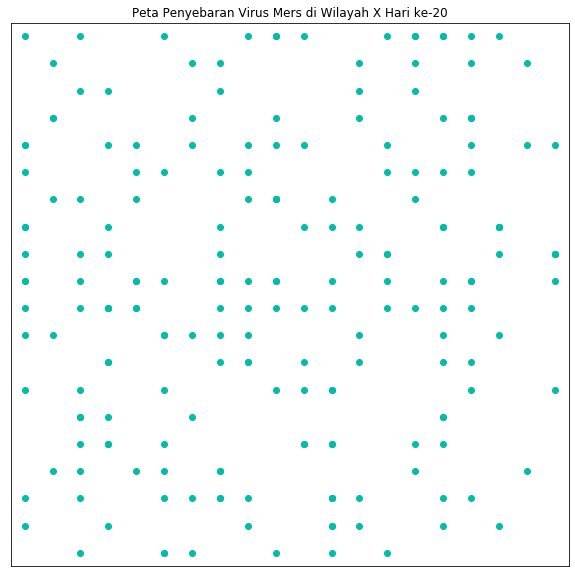

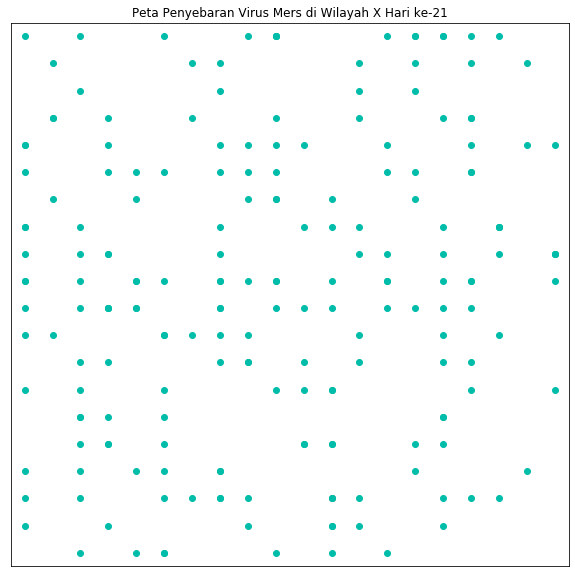

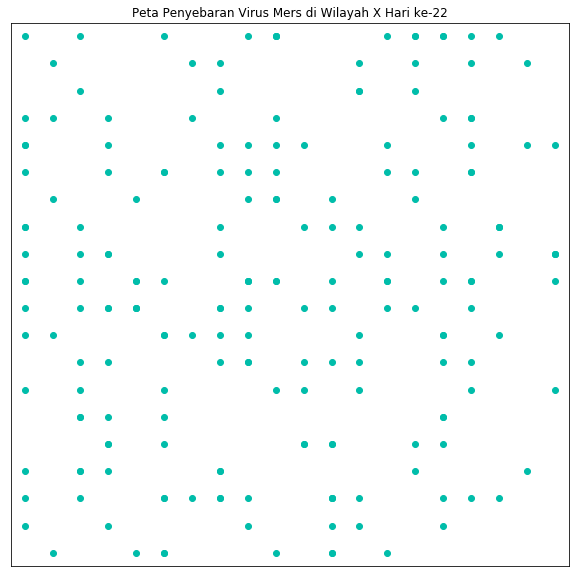

In [117]:
wilayah.animasi(1)

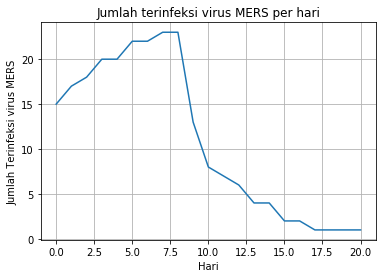

In [118]:
wilayah.plotTerinfeksi(1)